# Análise para uso de Bicicletas em Washinton D.C entre 2011 e 2012

## Ciclo de análise

1) Entendendo o proposta
2) Coleta de dados
3) Checagem de dados
4) Tratamento e tradução dos dados
5) Explorando os dados (Visualização)
6) Explorando os dados (Análise de correlação de variáveis)
7) Aplicando modelos de regressão linear
8) Conclusão

### 1. Entendendo a proposta

#### 1.1 Proposta

O projeto tem como proposta realizar uma abordagem descritiva na coleta de dados realizada em sistemas de compartilhamento de bicicletas em Washinton D.C entre 2011 e 2012, onde foram coletadas informações com o propósito de relacionar fatores adiversos: datas (dias de semana, finais de semana e feriados), fatores climáticos (ventos, temperatura e umidade), estações e quantidade de bicicletas alugadas (entre casuais e registrados). Assim como encontrar correlações e o relacionamento entre os dados.

### 2. Coleta de dados

#### 2.1 Origem do dataset

* Link para download do dataset: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
* Parte dos dados foi normalizada
* O dataset Contêm 17 colunas e 731 linhas

#### 2.2 Importação de dados e Instação e importação de pacotes necessários

Somente rodar se necessário, descomente a linha a baixo.

In [1]:
# %pip install locale
# %pip install statsmodels
# %pip install googletrans==4.0.0-rc1
# %pip install ppscore

Importação do Pandas, Numpy, Matplotlib, Seaborn e outros

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps # Precisa do pacote do pip install
from googletrans import Translator # Precisa do pacote do pip install
import locale # Precisa do pacote do pip install
from matplotlib.ticker import FuncFormatter
from statsmodels.distributions.empirical_distribution import ECDF

Importando dados CSV como um dataframe Pandas

In [3]:
caminho = 'Data/Bike-day.csv'
df = pd.read_csv(caminho)

Mostrando os primeiros cinco registros

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Função shape para indicar o tamanho do dataset

In [5]:
df.shape

(731, 16)

#### 2.3 Informação do dataset

* instant - Índice do registro
* dteday - Data
* season - Estações do ano: 1 - Inverno, 2 - Primavera, 3 - Verão, 4 - Outono
* yr - ano, sendo 0, 2011 e 1, 2012
* mnth - meses do ano de 1 a 12 de acordo com sua posição
* holiday - feriado, sendo o dia um feriado ou não (Fonte: http://dchr.dc.gov/page/holiday-schedule)
* weekday - dia da semana de 0 a 6 de acordo com sua posição começando por domingo
* workingday - dia de trabalho: se o dia não for final de semana nem feriado então é 1, caso contrário, 0
* weathersit - situação climática: 1 limpo, 2 poucas nuvens, 3 parcialmente nublado
* temp - temperatura normalizada em Celsius
* atemp - sensação termica normalizada em Celsius
* hum - umidade normalizada
* windspeed - velocidade do vento normalizada
* casual - numero total de casuais no dia
* registered - numero total de registrados no dia
* cnt - numero total de bicicletas alugadas incluindo casuais e registrados

### 3. Checagem de dados

* Verificação de valores nulos
* Verificação de valores duplicados
* Verificação dos tipos de dados
* Verificação de valores únicos de cada coluna
* Verificação das estatísticas do dataset

#### 3.1 Verificação de valores nulos

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Não há valores nulos no dataset

#### 3.2 Verificação de valores duplicados

In [7]:
df.duplicated().sum()

0

Não há valores duplicados no dataset

#### 3.3 Verificação dos tipos de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### 3.4 Verificação de valores únicos de cada coluna

In [9]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### 3.5 Verificação das estatísticas do dataset

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Considerações:
* Com exceção da coluna instant e das colunas casual, registered e cnt (estes últimos sendo dados quantitativos discretos), as médias são próximas entre si variando entre 0.02 e 6.5
* O desvio padrão também segue um característica semelhante, variando entre 0.16 e 3.45
* Os valores mínimos e máximos dos dados quantitativos contínuo estão próximos

### 4. Tratamento e tradução dos dados

Função para realizar a tradução dos nomes das colunas

In [11]:
def traduzir_colunas(df, language='pt'):
    #Dicionario para as palavras que não foram traduzidas ou que foram traduzidas erroneamente 
    erro_ao_traduzir = {
        'dteday': 'Data',
        'mnth': 'Mês',
        'weathersit': 'Clima',
        'temp': 'Temperatura',
        'hum': 'Umidade',
        'windspeed': 'Velocidade do Vento',
        'registered': 'Registrados',
        'cnt': 'Total_Bikes',
        'atemp': 'Sensação térmica'
    }
    
    # Renomear as colunas
    traducoes = {}
    tradutor = Translator()
    for coluna in df.columns:
        try:
            if coluna in erro_ao_traduzir:
                traducoes[coluna] = erro_ao_traduzir[coluna] # Utilize a tradução personalizada
            else:
                traduzido = tradutor.translate(coluna, src='en', dest=language) # Tradução acontece aqui
                if traduzido and traduzido.text:
                    capslock = traduzido.text.capitalize() # Maiúscula na primeira letra de cada palavra

                    traducoes[coluna] = capslock
                else:
                    print(f"Erro ao traduzir a coluna '{coluna}': tradução retornou None ou texto vazio")
                    traducoes[coluna] = coluna # Manter o nome original em caso de erro
        except Exception as a:
            print(f"Erro ao traduzir a coluna '{coluna}': {a}")
            traducoes[coluna] = coluna # Manter o nome original em caso de erro

    df.columns = [traducoes.get(col, col) for col in df.columns]

Executa função de tradução

In [12]:
df_traduzido = df.copy()
traduzir_colunas(df_traduzido)
df_traduzido.head()

,Instante,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Remove o indexador da planilha

In [13]:
df_traduzido = df_traduzido.drop(columns=['Instante'])
df_traduzido.head()

,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Renomeando valores numéricos para estações do ano (season : season (1:winter, 2:spring, 3:summer, 4:fall)) e Ano  (yr : year (0: 2011, 1:2012))

In [14]:
if 'Temporada' in df_traduzido.columns:
        df_traduzido['Temporada'] = df_traduzido['Temporada'].replace({1: 'Inverno', 2: 'Primavera', 3: 'Verão', 4: 'Outono'})

if 'Ano' in df_traduzido.columns:
        df_traduzido['Ano'] = df_traduzido['Ano'].replace({0: '2011', 1: '2012'})
df_traduzido.head()

,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,2011-01-01,Inverno,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Inverno,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Inverno,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Inverno,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Inverno,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 5. Explorando os dados (Visualização)

#### 5.1 Registrados X Casuais

##### 5.1.1 Comparando Registrados x Casuais

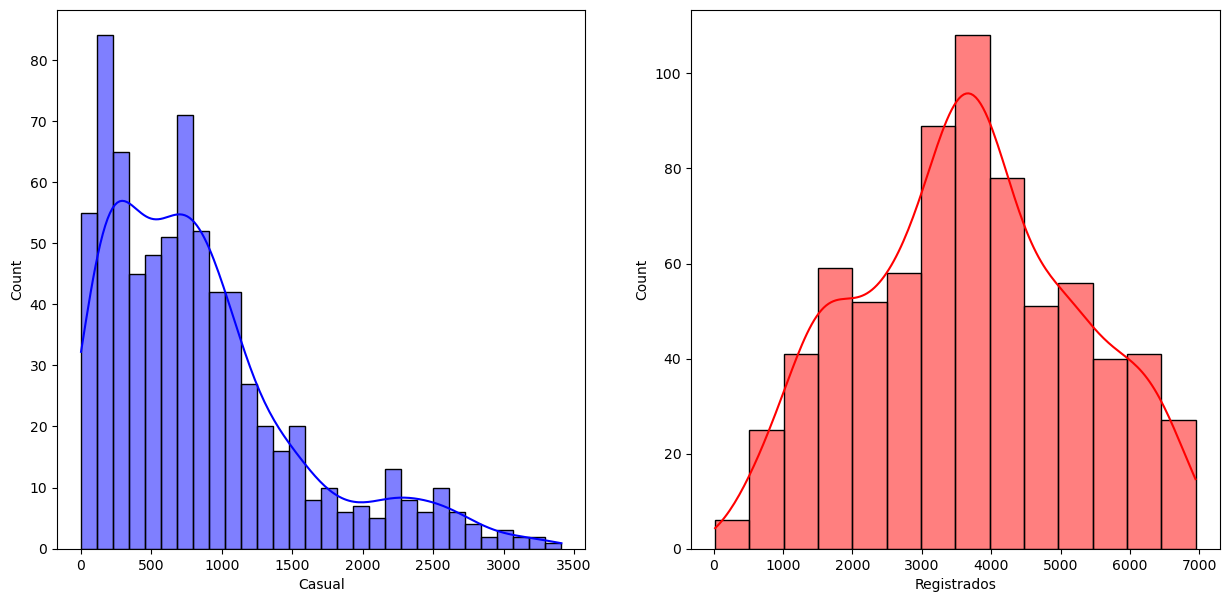

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_traduzido,x='Casual',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df_traduzido,x='Registrados',kde=True,color='red')
plt.show()

Considerações:
* Os usuários registrados tendem a usar as bicicletas alugadas com maior frequência

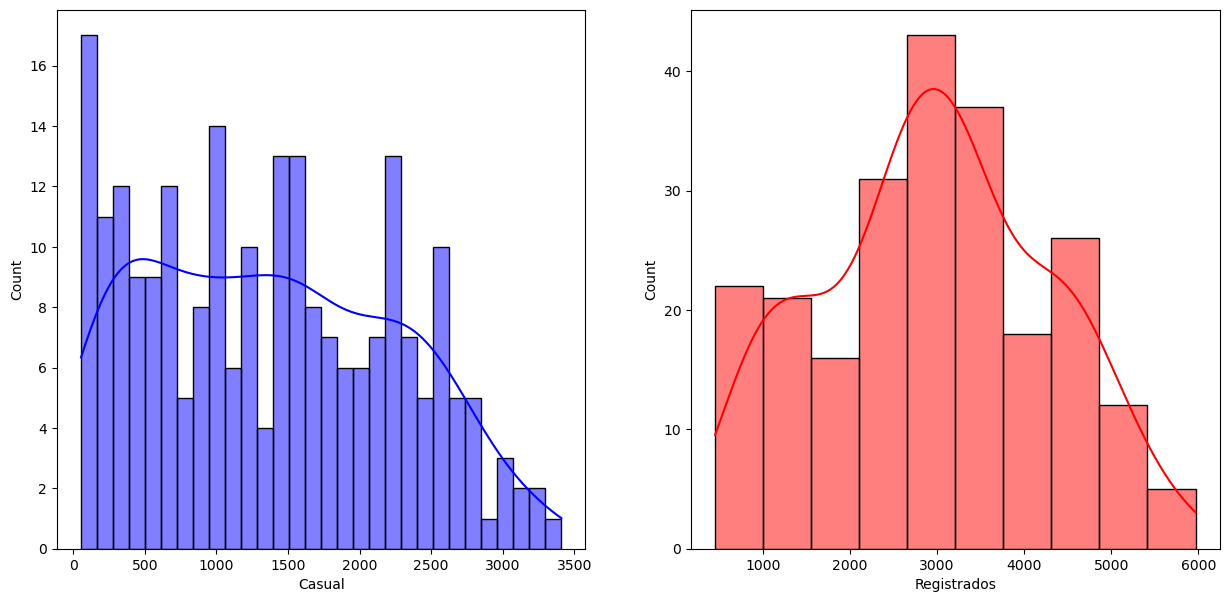

In [16]:
df_traduzido_com_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] == 0]
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_traduzido_com_feriado,x='Casual',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df_traduzido_com_feriado,x='Registrados',kde=True,color='red')
plt.show()

Considerações:
* Existe um número maior de usuários casuais em finais de semana e feriados, enquanto que os registrados tendem a manter a mesma frequencia

##### 5.1.2 Impacto das Condições Climáticas (Clima, Temperatura, Umidade, Velocidade do Vento)

Gráfico de dispersão com regressão e intervalo de confiança

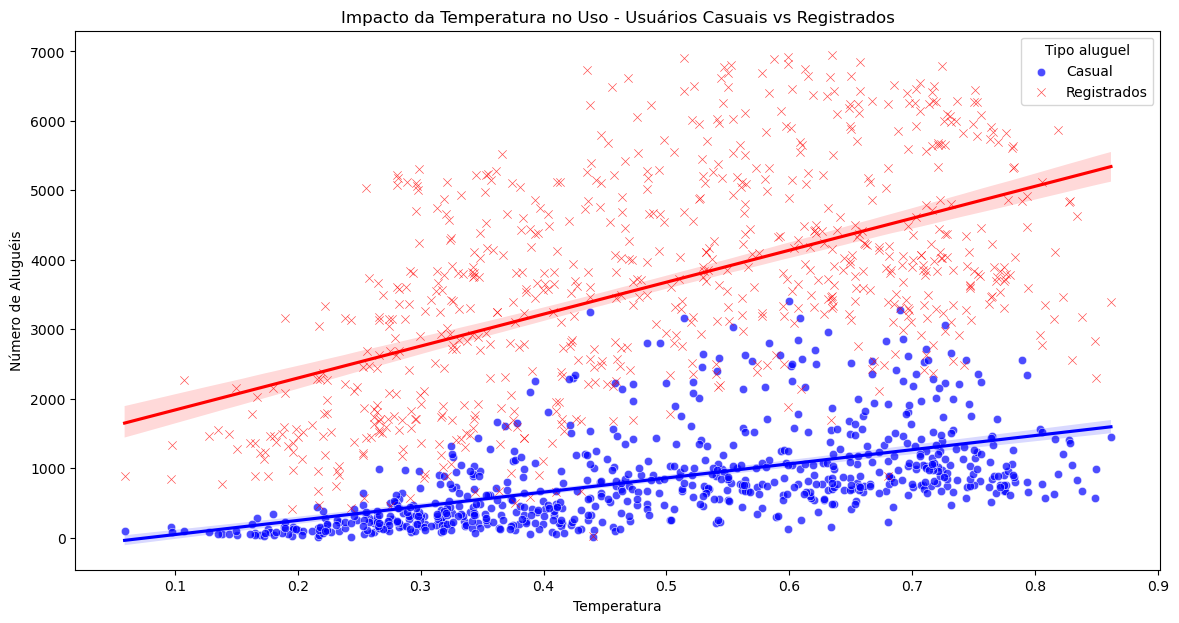

In [17]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Verificando apenas em dias de trabalho

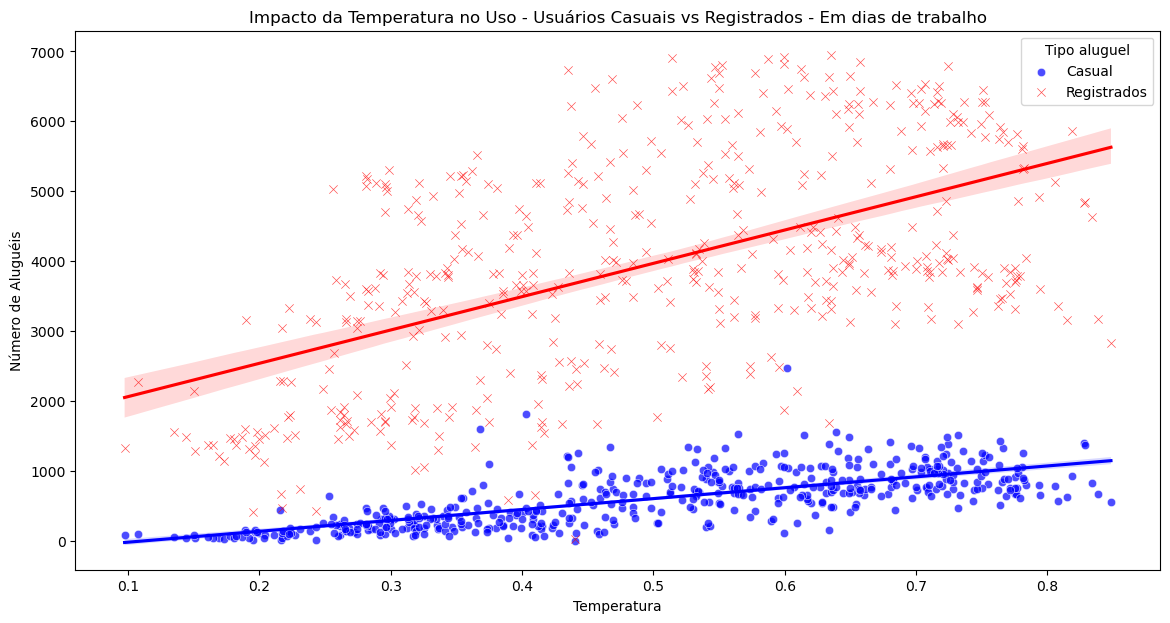

In [18]:
df_traduzido_sem_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] != 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em dias de trabalho')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Verificando com feriados/finais de semana

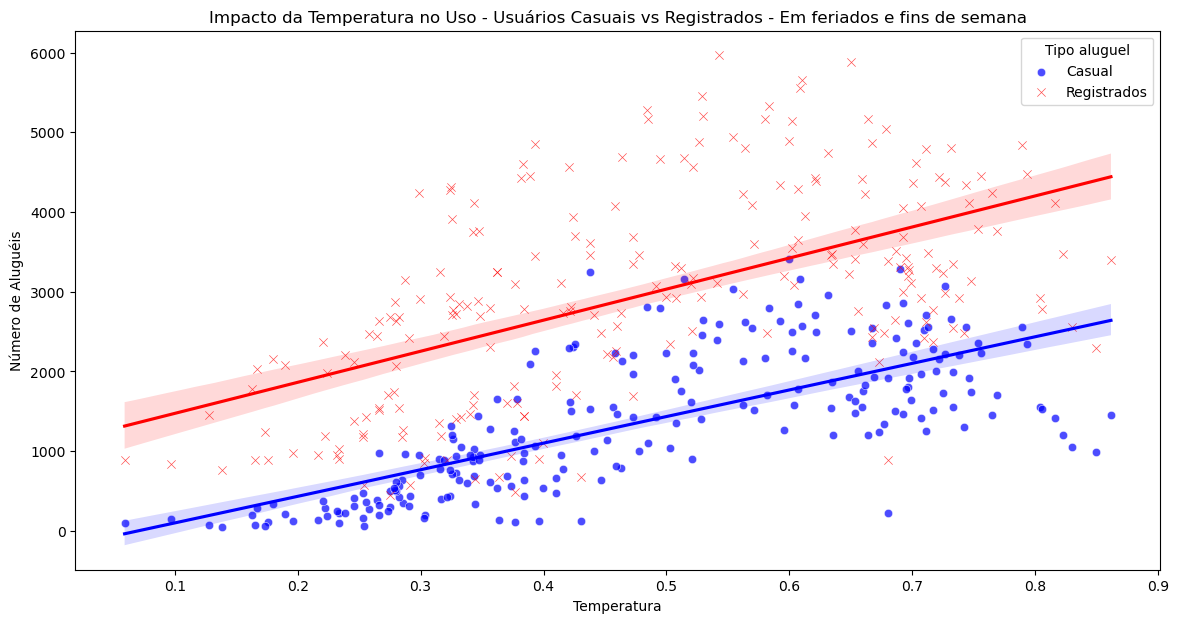

In [19]:
df_traduzido_com_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] == 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em feriados e fins de semana')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Embora não seja uma variável que diretamente se relaciona com a quantidade de aluguéis, tanto no casual quanto no registrado existe uma tendência entre temperatura e número de aluguéis, tanto em feriados/fins de semana quanto em dias de trabalho normais

Verificando a influência da umidade no número de aluguéis

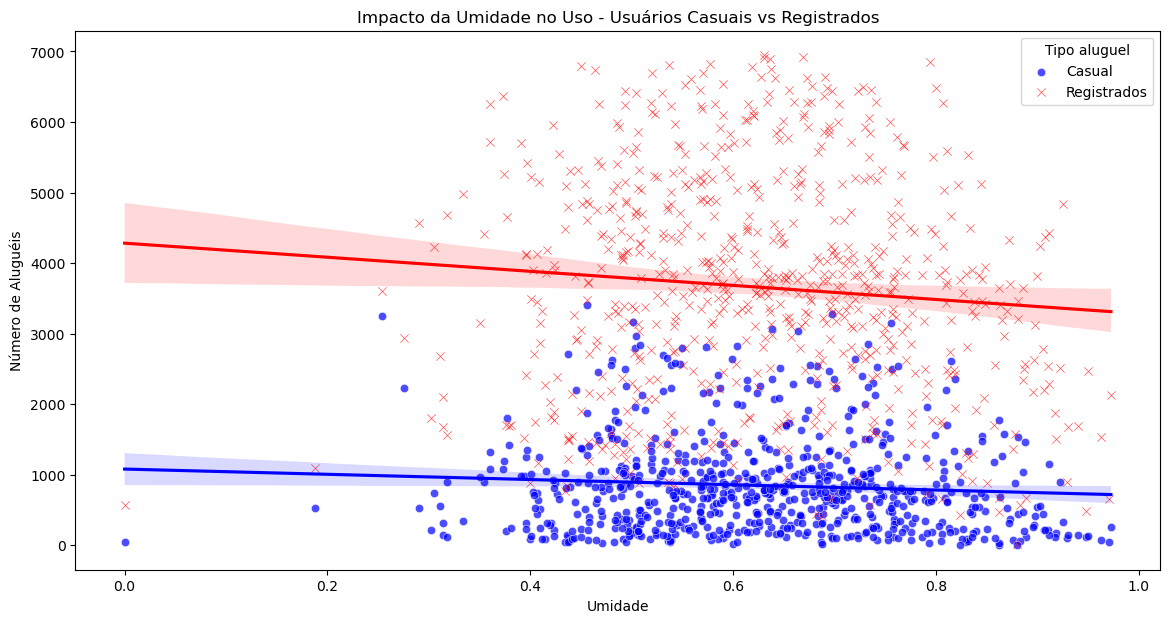

In [20]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Umidade', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Umidade', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Umidade', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Umidade', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Umidade no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Umidade')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Aparentemente não relação entre a umidade e o número de aluguéis tanto para casuais como para registrados

Verificando a influência da velocidade do vento no número de aluguéis

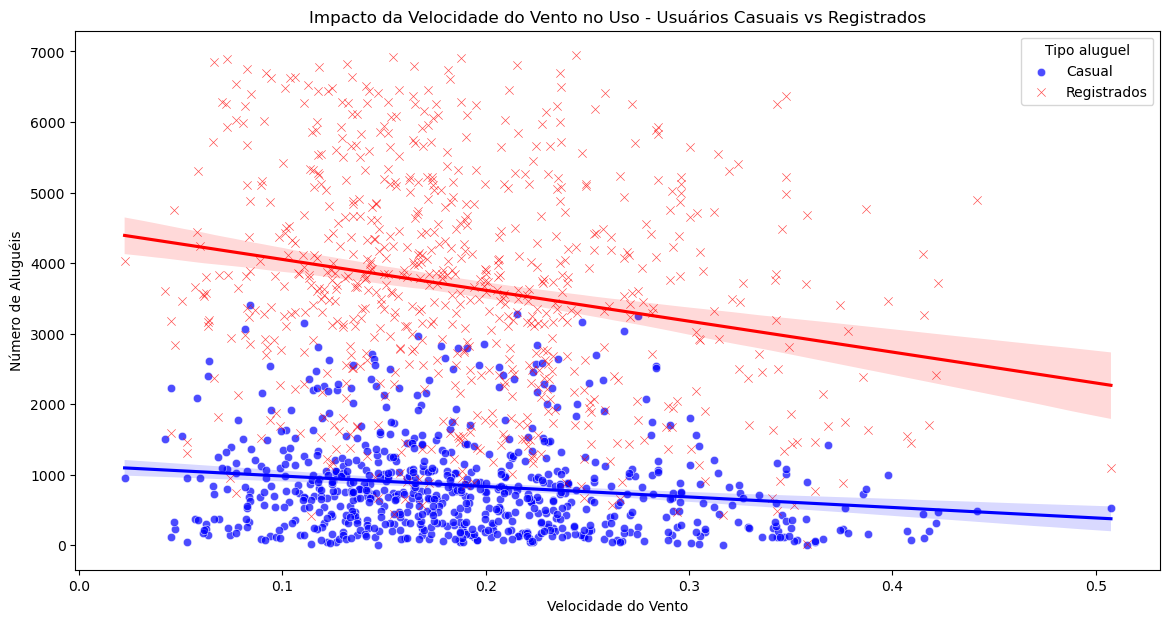

In [21]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Velocidade do Vento no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Aparentemente não relação entre a umidade e o número de aluguéis tanto para casuais como para registrados

#### 5.2 Relação Temporada x aluguel

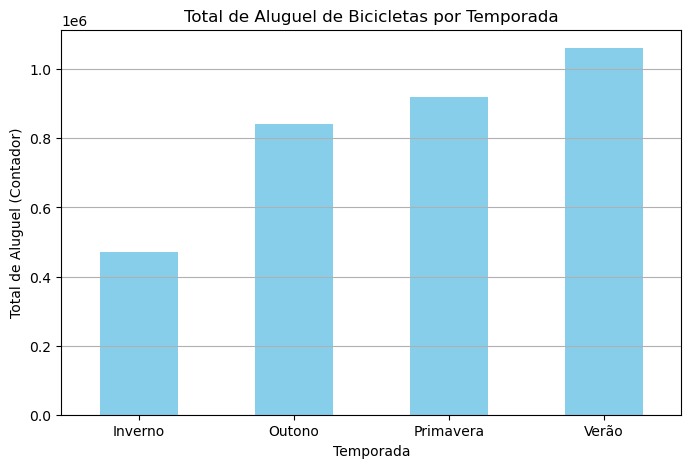

In [22]:
contador_temporada_X_Aluguel = df_traduzido.groupby('Temporada')['Total_Bikes'].sum()

plt.figure(figsize=(8, 5))
contador_temporada_X_Aluguel.plot(kind='bar', color='skyblue')
plt.title('Total de Aluguel de Bicicletas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Aluguel (Contador)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Elencando as temporadas por número de alugueis totais

In [23]:
top_temporadas = contador_temporada_X_Aluguel.sort_values(ascending=False).head(4)
for i, (temporada, total) in enumerate(top_temporadas.items(), start=1):
    print(f'Top {i}: {temporada} com {total} aluguéis')

Top 1: Verão com 1061129 aluguéis
Top 2: Primavera com 918589 aluguéis
Top 3: Outono com 841613 aluguéis
Top 4: Inverno com 471348 aluguéis


Considerações:
* Estações mais quentes tem um número maior de bicicletas alugadas

##### 5.2.1 Relação Mês x aluguel

formatação personalizada que formata os valores numéricos de acordo com a configuração de localidade especificada mas está presente para compatibilidade com a interface esperada pelo "FuncFormatter"

In [24]:
def format_func(value, tick_number):
    return locale.format_string('%.0f', value, grouping=True)

Total

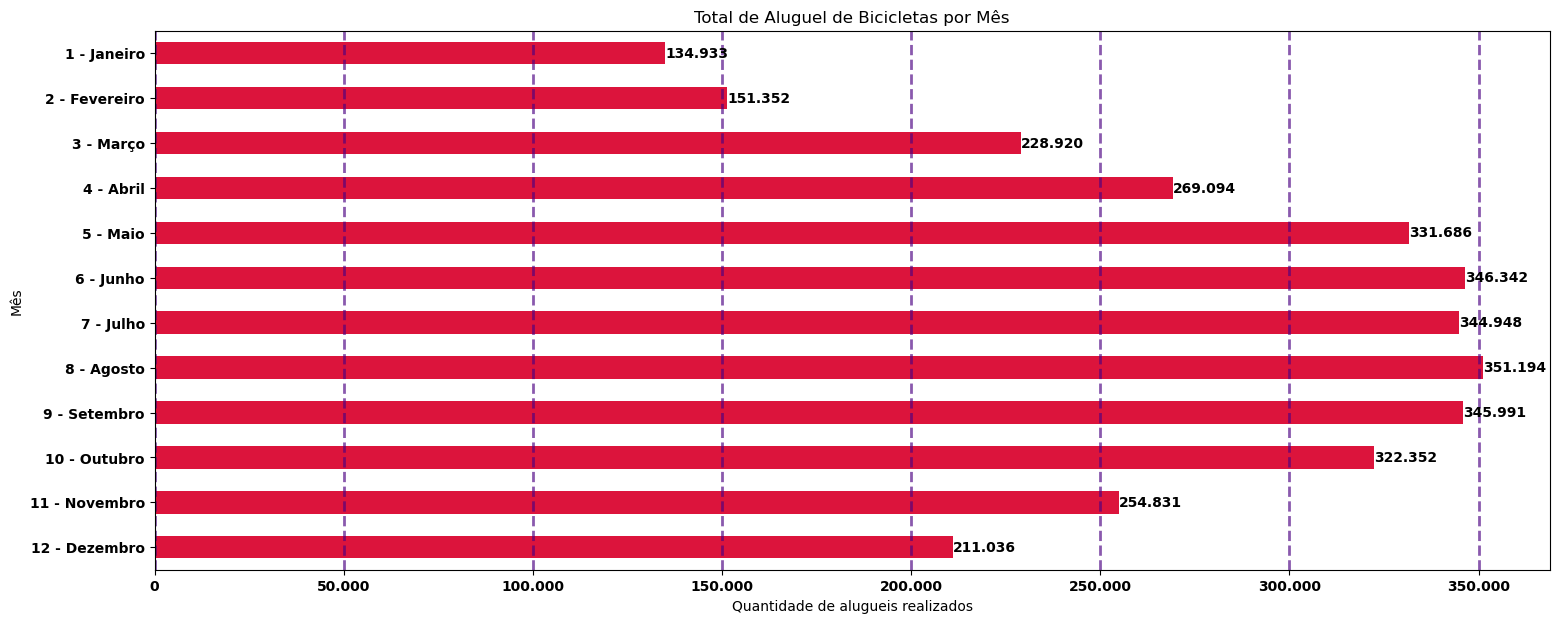

In [25]:
locale.setlocale(locale.LC_ALL, 'de_DE.UTF-8')
formatter = FuncFormatter(format_func)

BikesPorMes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes.index]


plt.figure(figsize=(18, 7))
BikesPorMes.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

2011

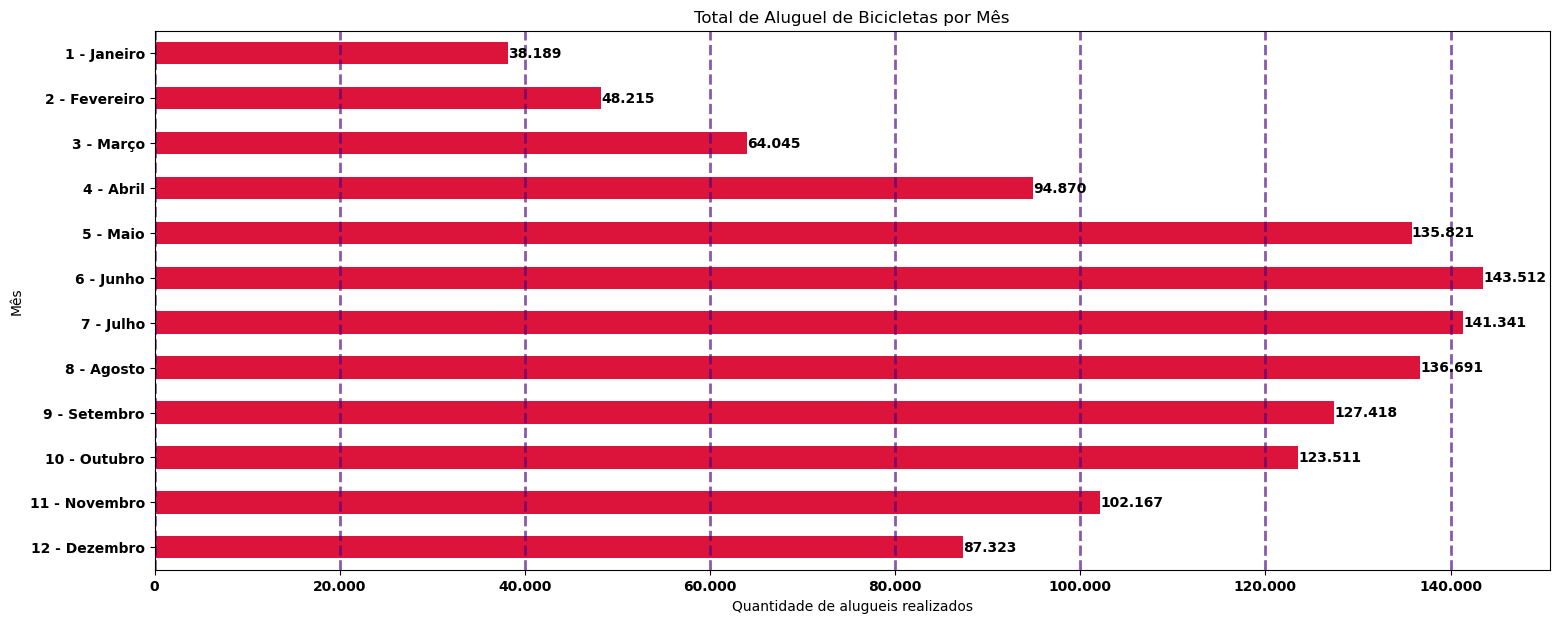

In [26]:
BikesPorMes2011 = df_traduzido[df_traduzido['Ano'] == '2011'].groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes2011.index]


plt.figure(figsize=(18, 7))
BikesPorMes2011.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes2011)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes2011):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

2012

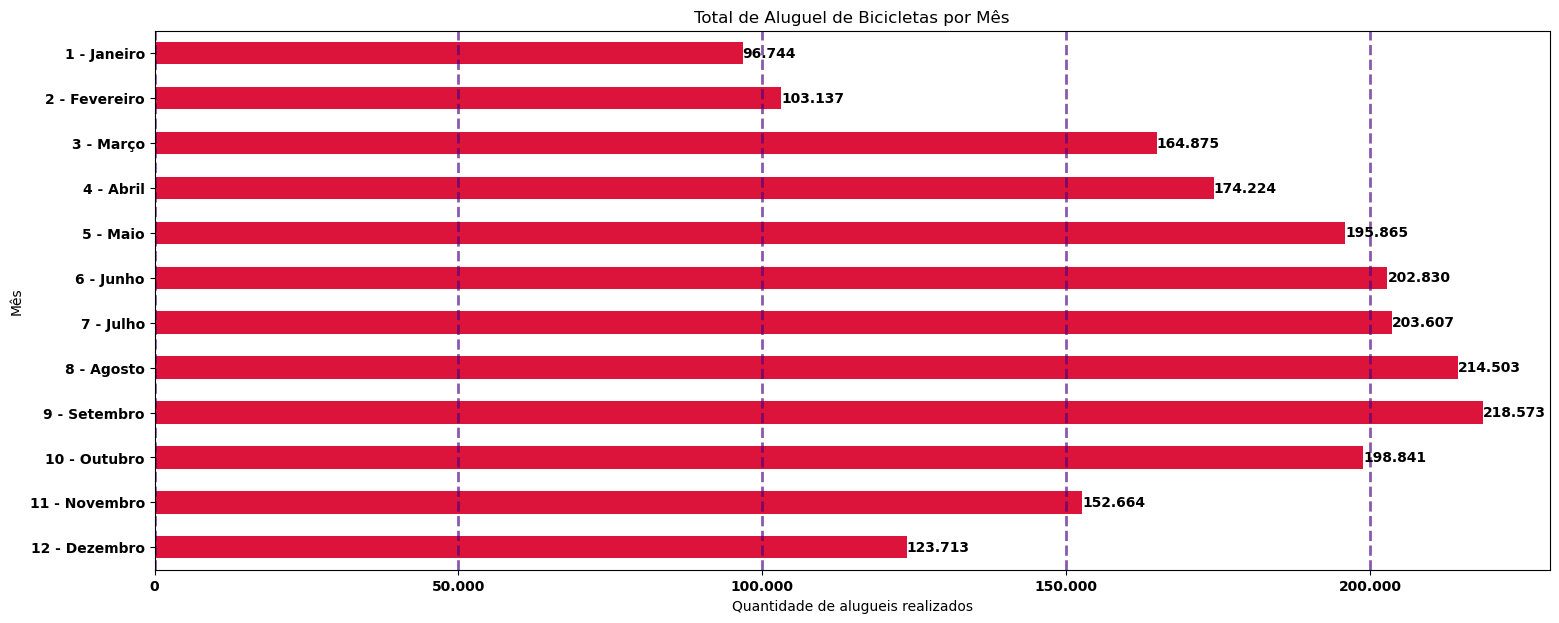

In [27]:
BikesPorMes2012 = df_traduzido[df_traduzido['Ano'] == '2012'].groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes2012.index]


plt.figure(figsize=(18, 7))
BikesPorMes2012.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes2012)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes2012):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

Relação Bikes x Ano

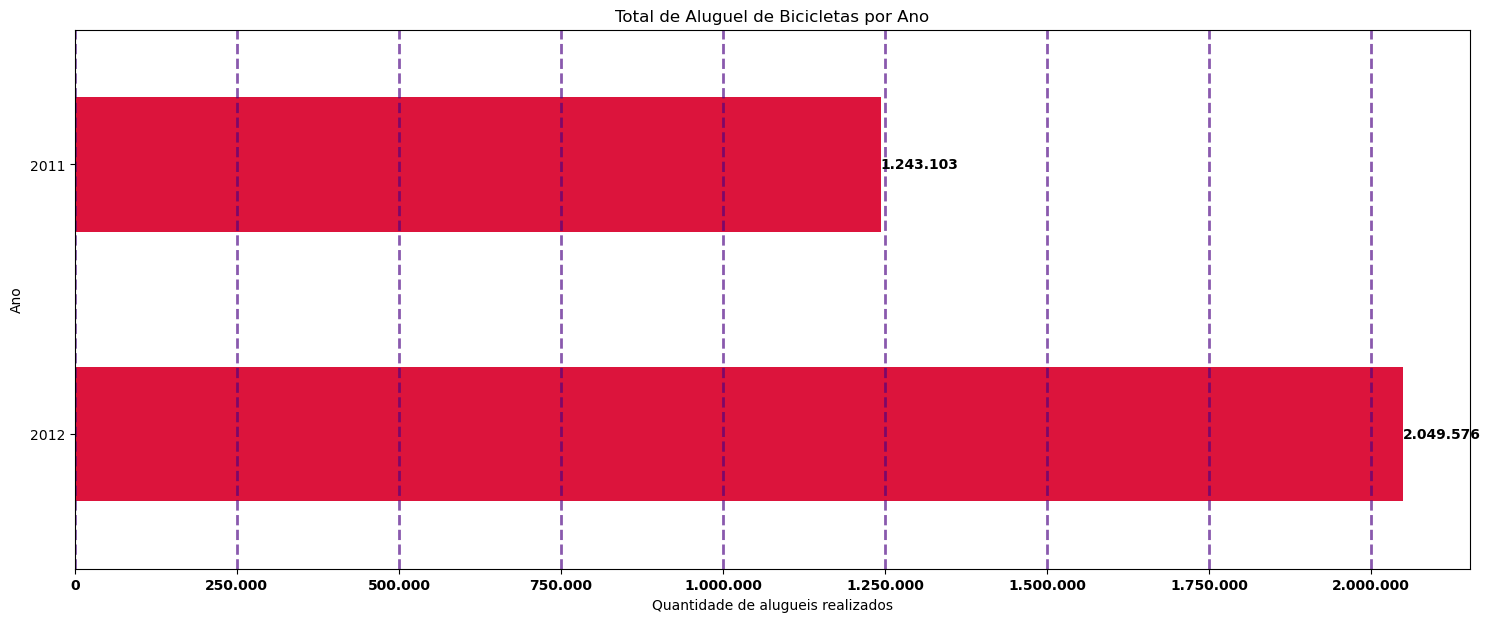

In [28]:
BikesPorAno = df_traduzido.groupby('Ano')['Total_Bikes'].sum()

plt.figure(figsize=(18, 7))
BikesPorAno.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Ano')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Ano')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# Make the x-tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

# Annotate each bar with the value
for index, value in enumerate(BikesPorAno):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

Considerações:
* Os meses de Maio a Outubro apresentam maior número de aluguéis, em ambos os anos

##### 5.2.2 Relação Temperatura x Aluguel ECDF

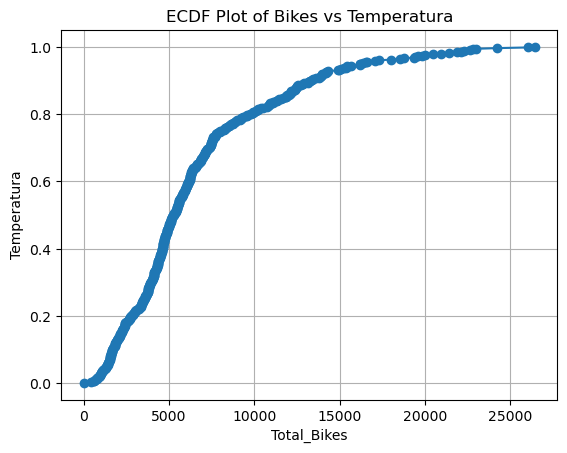

In [29]:
bikes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
TemperaturaPorMes = df_traduzido.groupby('Mês')['Temperatura'].mean()
BikesPorTemperatura = df_traduzido.groupby('Temperatura')['Total_Bikes'].sum()
ecdf = ECDF(BikesPorTemperatura)

# Plot the ECDF
plt.plot(ecdf.x, ecdf.y, marker='o', linestyle='-')
plt.xlabel('Total_Bikes')
plt.ylabel('Temperatura')
plt.title('ECDF Plot of Bikes vs Temperatura')
plt.grid(True)
plt.show()


Considerações:
* Embora não seja uma tendência acentuada, existe sim uma tendência que mostra que quanto maior a temperatura, maior o uso de aluguéis de bicicletas

### 6. Explorando os dados (Análise de correlação de variáveis)

##### 6.1 Verificando correlação entre variáveis

Transformando os dados nominais da temporada em valores numéricos

In [30]:
df_corr = df_traduzido.copy()
df_corr['Temporada'] = df_corr['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

In [31]:
df_corr = df_corr.drop(columns=['Data', 'Ano'])

Aplicando o heatmap com o método de Pearson

<Axes: >

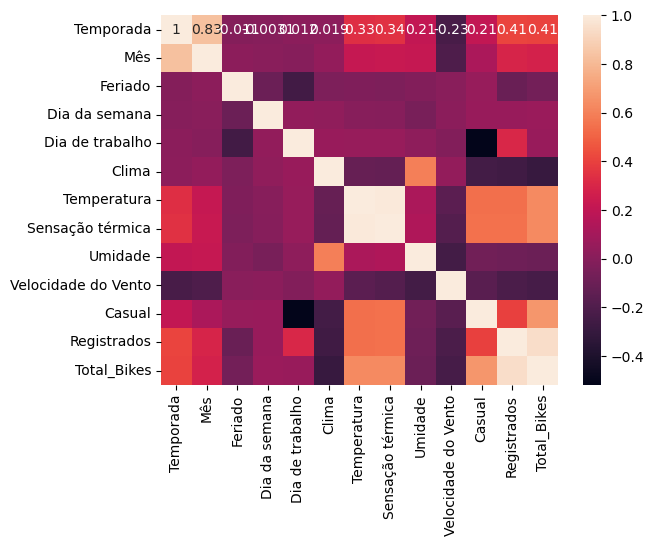

In [32]:
sns.heatmap(df_corr.corr(), annot = True)

Aplicando o heatmap com o método de Spearman

<Axes: >

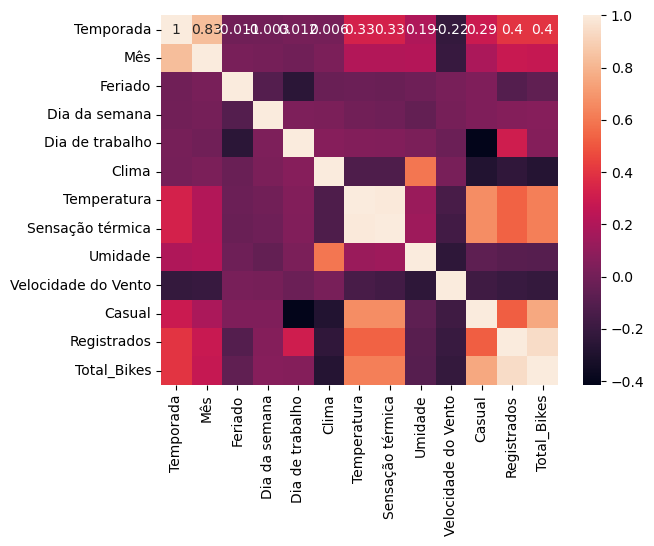

In [33]:
sns.heatmap(df_corr.corr(method= 'spearman'), annot = True)

Considerações:
* Tanto na análise de correlação de pearson quanto a de spearman indicam que tanto a temperatura quanto a sensação térmica influenciam no uso de bicicletas 

##### 6.2 Utilizando o método PPS (Predictive Power Score - Pontuação de Poder Preditivo)

Criação da matriz de PPScore de todo o dataset

In [34]:
matrix_pps = pps.matrix(df_corr)
matrix_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Temporada,Temporada,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Temporada,Mês,0.612861,regression,True,mean absolute error,2.991792,1.158240,DecisionTreeRegressor()
2,Temporada,Feriado,0.000000,regression,True,mean absolute error,0.028728,0.055615,DecisionTreeRegressor()
3,Temporada,Dia da semana,0.000000,regression,True,mean absolute error,1.718194,1.729011,DecisionTreeRegressor()
4,Temporada,Dia de trabalho,0.000000,regression,True,mean absolute error,0.316005,0.432688,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Total_Bikes,Umidade,0.000000,regression,True,mean absolute error,0.116434,0.153643,DecisionTreeRegressor()
165,Total_Bikes,Velocidade do Vento,0.000000,regression,True,mean absolute error,0.060702,0.080512,DecisionTreeRegressor()
166,Total_Bikes,Casual,0.074592,regression,True,mean absolute error,506.383037,468.610697,DecisionTreeRegressor()
167,Total_Bikes,Registrados,0.628836,regression,True,mean absolute error,1263.709986,469.044020,DecisionTreeRegressor()


Filtrar apenas as relações com a variável alvo

In [35]:
pps_alvo = matrix_pps[matrix_pps['y'] == 'Total_Bikes']
pps_alvo

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
12,Temporada,Total_Bikes,0.178853,regression,True,mean absolute error,1581.454172,1298.606520,DecisionTreeRegressor()
25,Mês,Total_Bikes,0.163606,regression,True,mean absolute error,1581.454172,1322.718057,DecisionTreeRegressor()
38,Feriado,Total_Bikes,0.001195,regression,True,mean absolute error,1581.454172,1579.564616,DecisionTreeRegressor()
51,Dia da semana,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,1600.977581,DecisionTreeRegressor()
64,Dia de trabalho,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,1582.873775,DecisionTreeRegressor()
77,Clima,Total_Bikes,0.056168,regression,True,mean absolute error,1581.454172,1492.627276,DecisionTreeRegressor()
90,Temperatura,Total_Bikes,0.044871,regression,True,mean absolute error,1581.454172,1510.492162,DecisionTreeRegressor()
103,Sensação térmica,Total_Bikes,0.010464,regression,True,mean absolute error,1581.454172,1564.906324,DecisionTreeRegressor()
116,Umidade,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,1988.333187,DecisionTreeRegressor()
129,Velocidade do Vento,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,2045.643180,DecisionTreeRegressor()


Considerações: 
* O PPScore indica que o mês tem um poder preditivo maior que a temperatura assim como a temporada

Variáveis que possuem valor maior que 0.05 em relação ao Total_Bikes

In [36]:
selected_variables = pps_alvo[pps_alvo['ppscore'] > 0.05]['x'].tolist()
selected_variables

['Temporada', 'Mês', 'Clima', 'Casual', 'Registrados', 'Total_Bikes']

Considerações:
* O clima, o Mês e a temporada parecem ter um valor mais significativo para poder indicar o volume total de aluguéis de bike

### 7. Aplicando modelos de regressão linear

Modelos escolhidos:

- Regressão linear
- Lasso
- Elastic Net
- Regressão Ridge

##### 7.1 Bibliotecas dos modelos e de avaliações

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### 7.2 Tratamento dos dados e separação de treino e teste

In [38]:
df_modelos = df_traduzido.drop(columns=['Data','Ano'])

Tratando os meses

In [39]:
df_modelos['Temporada'] = df_traduzido['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

Separação entre treino e teste

In [40]:
X = df_modelos.drop(columns = 'Total_Bikes')
y = df_modelos['Total_Bikes']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

#### 7.3 Avaliando modelos

##### 7.3.1 Regressão Linear - Simples

Grid de parâmetros para o modelo

In [41]:
param_grid_linear = {
}

Inicio do modelo linear - Simples

In [42]:
modelo_linear= LinearRegression(
   fit_intercept=False   
)

Configurar o GridSearchCV

In [43]:
grid_search_modelo_linear = GridSearchCV(estimator=modelo_linear, param_grid=param_grid_linear, cv=5)

Fit para treino

In [44]:
grid_search_modelo_linear.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=LinearRegression(fit_intercept=False),
             param_grid={})

Verificação dos melhores parâmetros do grid

In [45]:
grid_search_modelo_linear.best_estimator_

LinearRegression(fit_intercept=False)

Predição

In [46]:
y_preditoLinear = grid_search_modelo_linear.predict(X_teste)

Calcular erro quadrático médio

In [47]:
mse = mean_squared_error(y_teste, y_preditoLinear)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 8.685472763490571e-24


Calcular erro absoluto médio

In [48]:
mae = mean_absolute_error(y_teste, y_preditoLinear)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 2.544685550711453e-12


Calcular R²

In [49]:
r2 = r2_score(y_teste, y_preditoLinear)
print(f'R²: {r2}')

R²: 1.0


Adicionando ruido para alterações no dados de teste e validar um outro cenário contornando o possível overfitting gerado no fit anterior. 

In [50]:
y_preditoLinear_ruidoso = y_preditoLinear + np.random.normal(0, 0.1, y_preditoLinear.shape)

Print do R2 com ruído.

In [51]:
r2_ruidoso = r2_score(y_teste, y_preditoLinear_ruidoso)
print(f'R² com ruído: {r2_ruidoso}')

R² com ruído: 0.9999999976041433


##### 7.3.2 Lasso

Definir a grade de parâmetros para Lasso

In [52]:
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

Inicializar o modelo Lasso

In [53]:
lasso = Lasso()

Configurar o GridSearchCV

In [54]:
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5)

Fit para treino

In [55]:
grid_search_lasso.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]})

Melhor alpha encontrado

In [56]:
print(f'Melhor alpha para Lasso: {grid_search_lasso.best_params_}')
print(f'Melhor pontuação: {grid_search_lasso.best_score_}')

Melhor alpha para Lasso: {'alpha': 0.1}
Melhor pontuação: 0.9999999999949258


Verificação dos melhores parâmetros do grid

In [57]:
grid_search_lasso.best_estimator_

Lasso(alpha=0.1)

Regressão Lasso

In [58]:
y_preditoLasso = grid_search_lasso.predict(X_teste)

Calcular erro quadrático médio

In [59]:
mse = mean_squared_error(y_teste, y_preditoLasso)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 3.655385720998871e-05


Calcular erro absoluto médio

In [60]:
mae = mean_absolute_error(y_teste, y_preditoLasso)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.004649057244893936


Calcular R²

In [61]:
r2 = r2_score(y_teste, y_preditoLasso)
print(f'R²: {r2}')

R²: 0.9999999999908841


##### 7.3.3 Elastic Net

Grid de parâmetros para o modelo

In [62]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]
}

Montagem do modelo

In [63]:
modelo_elastic = GridSearchCV(ElasticNet(),
                                param_grid,
                                scoring= 'neg_mean_squared_error',
                                n_jobs = -1)

Fit com os dados de treino

In [64]:
modelo_elastic.fit(X_treino, y_treino)

GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]},
             scoring='neg_mean_squared_error')

Verificação dos melhores parâmetros do grid

In [65]:
modelo_elastic.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.2)

Regressão

In [66]:
y_predito_EN = modelo_elastic.predict(X_teste)

Calcular erro quadrático médio

In [67]:
mse = mean_squared_error(y_teste, y_predito_EN)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 1.4683596968653836e-07


Calcular erro absoluto médio

In [68]:
mae = mean_absolute_error(y_teste, y_predito_EN)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.000293591522784371


Calcular R²

In [69]:
r2 = r2_score(y_teste, y_predito_EN)
print(f'R²: {r2}')

R²: 0.9999999999999634


##### 7.3.4 Regressão Ridge

Grid de parâmetros para o modelo

In [70]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['svd','cholesky','lsqr', 'sparse_cg', 'sag', 'saga']
}

Montagem do modelo

In [71]:
modelo_ridge = GridSearchCV(Ridge(),
                                param_grid,
                                scoring= 'neg_mean_squared_error',
                                n_jobs = -1)

Fit com os dados de treino

In [72]:
modelo_ridge.fit(X_treino, y_treino)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_squared_error')

Verificação dos melhores parâmetros do grid

In [73]:
modelo_ridge.best_estimator_

Ridge(alpha=0.1, solver='svd')

Regressão

In [74]:
y_predito_Ridge = modelo_elastic.predict(X_teste)

Calcular erro quadrático médio

In [75]:
mse = mean_squared_error(y_teste, y_predito_Ridge)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 1.4683596968653836e-07


Calcular erro absoluto médio

In [76]:
mae = mean_absolute_error(y_teste, y_predito_Ridge)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.000293591522784371


Calcular R²

In [77]:
r2 = r2_score(y_teste, y_predito_Ridge)
print(f'R²: {r2}')

R²: 0.9999999999999634


#### 8. Conclusão